# Continous Probability Distributions
------

1. [StatTreak Overview](http://stattrek.com/probability-distributions/probability-distribution.aspx)
2. [Common Probability Distributions: The Data Scientist’s Crib Sheet](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)
3. [Scipy Distributions](https://docs.scipy.org/doc/scipy/reference/stats.html)
  -  [scipy distribution functions](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)
4. [R E-Tutorial Introduction to Stats](http://www.r-tutor.com/elementary-statistics/probability-distributions)
5. Truncated distributions.
  -  [How to sample truncated distributions](https://www.google.co.uk/search?client=firefox-b-ab&dcr=0&ei=1ShNWuXYIM3IwALT_orgCQ&q=truncated+distribution+python+tutorial&oq=truncated+distribution+python+tut&gs_l=psy-ab.3.0.33i21k1j33i160k1.14122.16124.0.17521.11.11.0.0.0.0.164.1137.6j5.11.0....0...1c.1.64.psy-ab..0.11.1129...0j0i22i30k1.0.chuX-eNenpo)
  
  
In this notebook we will demonstrate common probability distributions and there implementations in SciPy.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Normal $(aka.Guassian)$ Distribution

##### Consider:
Assume that the test scores of a college entrance exam fits a normal distribution. Furthermore, the mean test score is 72, and the standard deviation is 15.2. What is the percentage of students scoring 84 or more in the exam? 

84 or more = 0.215 %


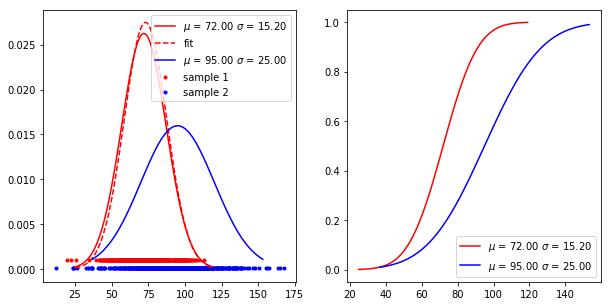

In [2]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))
from scipy.stats import norm

mu = 72
si = 15.2
num = 500
x_guess = 84
sample = norm.rvs(loc=mu, scale=si, size=num)

x = np.linspace(norm.ppf(0.001, loc=mu, scale=si),
                norm.ppf(0.999, loc=mu, scale=si), num)

pdf = norm.pdf(x, loc=mu, scale=si)
cdf = norm.cdf(x, loc=mu, scale=si)

print('%s or more = %.3f %%' %(x_guess,
                               1.0 - norm.cdf(x_guess, loc=mu, scale=si)))

ax1.plot(x, pdf, color='red',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))
ax2.plot(x, cdf, color='red',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))

ax1.scatter(sample, [0.001]*num, marker='.', color='red', label='sample 1')

mu_f, si_f = norm.fit(sample)
pdf_f = norm.pdf(x, loc=mu_f, scale=si_f)
ax1.plot(x, pdf_f, 'r--', label='fit')

mu = 95
si = 25
sample = norm.rvs(loc=mu, scale=si, size=num)
x = np.linspace(norm.ppf(0.01, loc=mu, scale=si),
                norm.ppf(0.99, loc=mu, scale=si), num)

pdf = norm.pdf(x, loc=mu, scale=si)
cdf = norm.cdf(x, loc=mu, scale=si)

ax1.plot(x, pdf, color='blue',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))
ax2.plot(x, cdf, color='blue',
         label=r'$\mu$ = %.2f $\sigma$ = %.2f' %(mu,si))

ax1.scatter(sample, [0.0001]*num, marker='.', color='blue',label='sample 2')

ax1.legend();
ax2.legend();

# Log-Normal $(Galton)$ Distribution 
[Wiki](https://en.wikipedia.org/wiki/Log-normal_distribution)<BR>
[Exaplain](http://www.statisticshowto.com/lognormal-distribution/)

An outcome that follows a log-normal distribution takes on values whose logarithm is normally distributed. Or: the exponentiation of a normally-distributed value is log-normally distributed. If sums of things are normally distributed, then remember that products of things are log-normally distributed.

or

A log-normal (or lognormal) distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. Thus:
 - If the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution. 
 - Likewise, if Y has a normal distribution, then the exponential function of Y, X = exp(Y), has a log-normal distribution.
 
#### Parameters
1. $shape$ = the shape parameter. Also the standard deviation for the lognormal, this affects the general shape of the distribution. Usually, these parameters are known from historical data. Sometimes, you might be able to estimate it with current data. The shape parameter doesn’t change the location or height of the graph; it just affects the overall shape. <BR><BR>
2. $loc$ =  the location parameter, which tells you where on the x-axis the graph is located.<BR><BR>
3. $scale$ = the scale parameter (this is also the median). This parameter shrinks or stretches the graph.

You can convert between log:exp distributions, e.g. the log of
our log-norm distributed values:

shape= 1.01 loc= 1.11 scale= 144.10 (median=147.64)

back to the normally distributed values:
mean= 4.98 and std-dev= 0.99


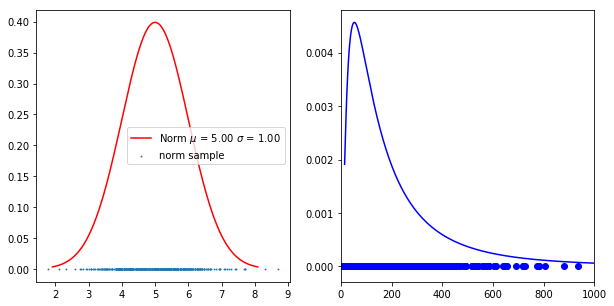

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(10,5))
from scipy.stats import norm

mu = 5
si = 1
num = 500
sample = norm.rvs(loc=mu, scale=si, size=num)

x = np.linspace(norm.ppf(0.001, loc=mu, scale=si),
                norm.ppf(0.999, loc=mu, scale=si), num)
pdf = norm.pdf(x, loc=mu, scale=si)

ax1.plot(x, pdf, color='red',
         label=r'Norm $\mu$ = %.2f $\sigma$ = %.2f' %(mu,si));
ax1.scatter(sample, [0]*num, label='norm sample', s=0.75);
ax1.legend();

from scipy.stats import lognorm
log_sample = np.exp(sample)

shape, mu_ln, si_ln = lognorm.fit(log_sample)

# si is similar to np.median(log_sample)

x = np.linspace(lognorm.ppf(0.01, s=shape, loc=mu_ln, scale=si_ln),
                lognorm.ppf(0.99, s=shape, loc=mu_ln, scale=si_ln), num)

pdf = lognorm.pdf(x, s=shape, loc=mu_ln, scale=si_ln)

ax2.plot(x, pdf, color='blue', label='fit lognorm')
ax2.scatter(log_sample, [0]*num, color='blue', label='log sample')

print("""You can convert between log:exp distributions, e.g. the log of
our log-norm distributed values:
\nshape= %.2f loc= %.2f scale= %.2f (median=%.2f)\n
back to the normally distributed values:
mean= %.2f and std-dev= %.2f""" 
      %(shape, mu_ln, si_ln, np.median(log_sample),
      np.log(log_sample).mean(), np.log(log_sample).std()))


ax2.set_xlim(0.01,1000);